In [4]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from tqdm import tqdm

In [5]:
import pickle
########### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "risorse/Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
label_file_name = "risorse/Ising2DFM_reSample_L40_T=All_labels.pkl"
#DATA
with open(data_file_name, 'rb') as f:
    print(f)
    data = pickle.load(f)
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)
#LABELS (convention is 1 for ordered states and 0 for disordered states)
with open(label_file_name, 'rb') as f:
    labels = pickle.load(f)

<_io.BufferedReader name='risorse/Ising2DFM_reSample_L40_T=All.pkl'>


In [6]:
#dividing in ordered, critical and disordered
Xo = data[:70000]
Xc = data[70001:100000]
Xd = data[100000:]

yo = labels[:70000]
yc = labels[70001:100000]
yd = labels[100000:]
print(data.shape)
print(yo)
print(yc)
print(yd)

(160000, 1600)
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


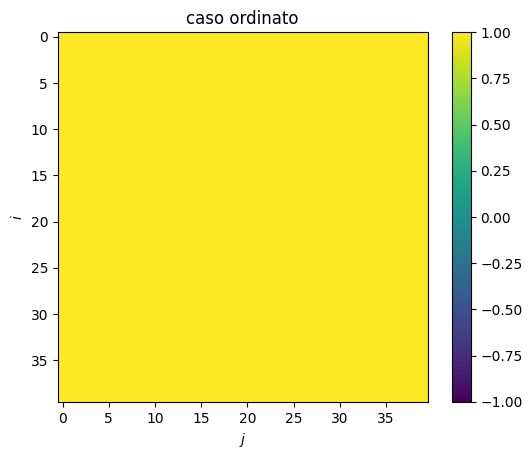

In [7]:
plt.imshow(np.array(Xo[1000]).reshape(40, 40), vmin = -1., vmax = 1)
plt.colorbar()
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
plt.title("caso ordinato")
plt.savefig("relazione/immagini/ex_ord.png", dpi = 800)

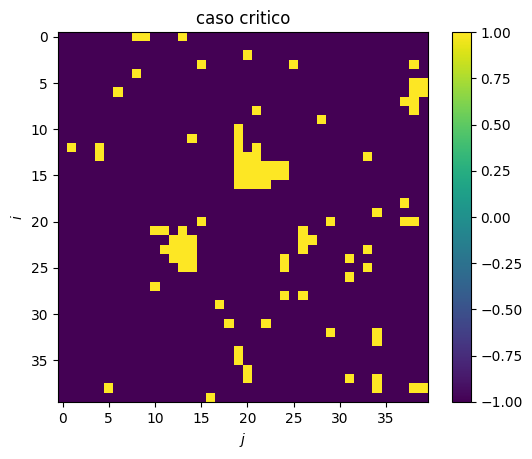

In [8]:
plt.imshow(np.array(Xc[1000]).reshape(40, 40), vmin = -1., vmax = 1)
plt.colorbar()
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
plt.title("caso critico")
plt.savefig("relazione/immagini/ex_crit.png", dpi = 800)

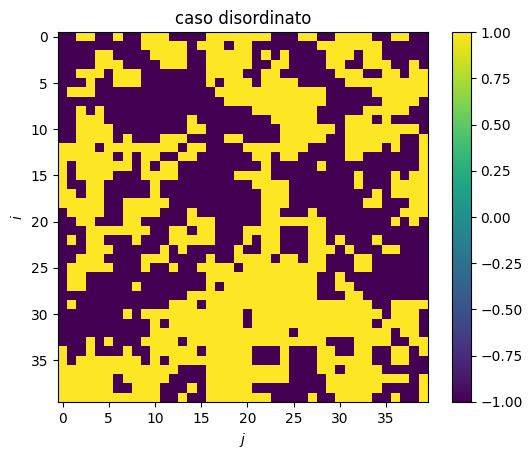

In [9]:
plt.imshow(np.array(Xd[1000]).reshape(40, 40), vmin = -1., vmax = 1)
plt.colorbar()
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
plt.title("caso disordinato")
plt.savefig("relazione/immagini/ex_dis.png", dpi = 800)

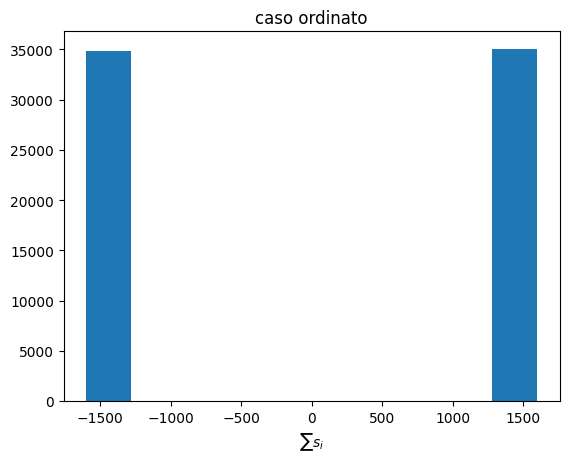

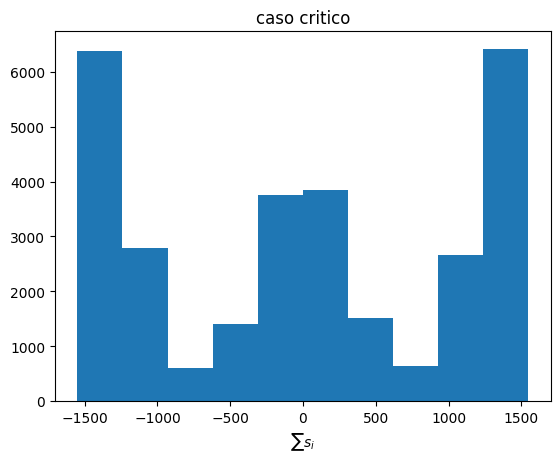

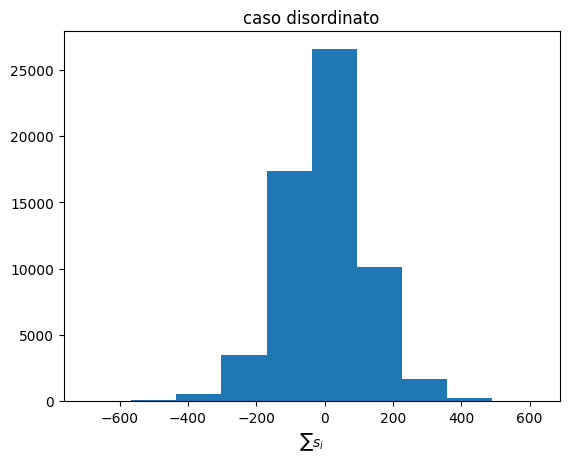

In [10]:
#visualizing distribution of energies in each regime
number_ordered = []
number_critical = []
number_disordered = []   

for i in range(Xo.shape[0]):
    number_ordered.append(np.sum(Xo[i]).tolist())

for i in range(Xc.shape[0]):
    number_critical.append(np.sum(Xc[i]).tolist())

for i in range(Xd.shape[0]):
    number_disordered.append(np.sum(Xd[i]).tolist())

fig, ax = plt.subplots()
ax.hist(number_ordered)
plt.xlabel(r"$\sum s_i$")
plt.title("caso ordinato")
fig.savefig("relazione/immagini/istogramma_ordinato.png", dpi = 800)

fig, ax = plt.subplots()
ax.hist(number_critical)
plt.xlabel(r"$\sum s_i$")
plt.title("caso critico")
fig.savefig("relazione/immagini/istogramma_critico.png", dpi = 800)

fig, ax = plt.subplots()
ax.hist(number_disordered)
plt.xlabel(r"$\sum s_i$")
plt.title("caso disordinato")
fig.savefig("relazione/immagini/istogramma_disordinato.png", dpi = 800)

In [11]:
#preparing feature matrix
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.2, random_state=0)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.2, random_state=0)

#training on ordered and disordered
X_train = np.concatenate((Xo_train, Xd_train))
y_train = np.concatenate((yo_train, yd_train))

In [12]:
#regularization parameter to iterate through
c_params = np.logspace(-5, 5, 20)

coefs = []
train_performance = []
test_perf_o = []
test_perf_c = []
test_perf_d = []
test_perf_o_and_d = []


for i in tqdm(range(c_params.size)):
    clf = LogisticRegression(C = c_params[i] , solver = "lbfgs")
    clf.fit(X_train, y_train)

    coefs.append(clf.coef_.tolist())
    train_performance.append(clf.score(X_train, y_train))
    #test_perf_o.append(clf.score(Xo_test, yo_test))
    test_perf_c.append(clf.score(Xc, yc))
    #test_perf_d.append(clf.score(Xd_test, yd_test))
    test_perf_o_and_d.append(clf.score(np.concatenate((Xo_test,Xd_test)), np.concatenate((yo_test,yd_test))))

    

100%|██████████| 20/20 [02:46<00:00,  8.31s/it]


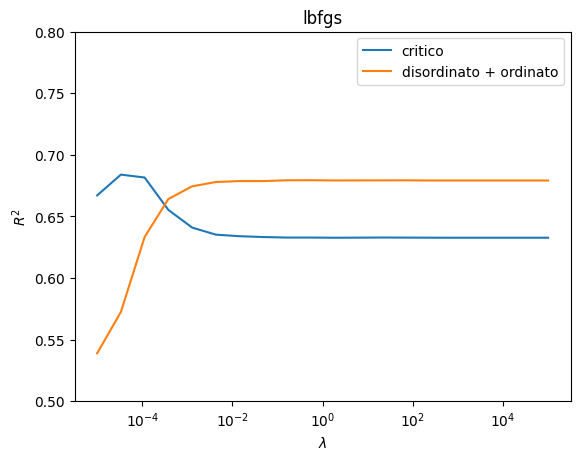

In [13]:
#plotting performance in function of regularization parameter
fig, ax = plt.subplots()
ax.semilogx(c_params, test_perf_c, label = "critico")
ax.semilogx(c_params, test_perf_o_and_d, label = "disordinato + ordinato")

ax.set_title("lbfgs")
ax.legend()
ax.set(ylim=(0.5, 0.8))
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$R^2$")
fig.savefig("relazione/immagini/lbfgs.png", dpi = 800)


In [14]:
#regularization parameter to iterate through
c_params = np.logspace(-5, 5, 20)

coefs = []
train_performance = []
test_perf_o = []
test_perf_c = []
test_perf_d = []
test_perf_o_and_d = []


for i in tqdm(range(c_params.size)):
    clf = LogisticRegression(C = c_params[i] , solver = "liblinear")
    clf.fit(X_train, y_train)

    coefs.append(clf.coef_.tolist())
    train_performance.append(clf.score(X_train, y_train))
    #test_perf_o.append(clf.score(Xo_test, yo_test))
    test_perf_c.append(clf.score(Xc, yc))
    #test_perf_d.append(clf.score(Xd_test, yd_test))
    test_perf_o_and_d.append(clf.score(np.concatenate((Xo_test,Xd_test)), np.concatenate((yo_test,yd_test))))

100%|██████████| 20/20 [09:45<00:00, 29.26s/it]


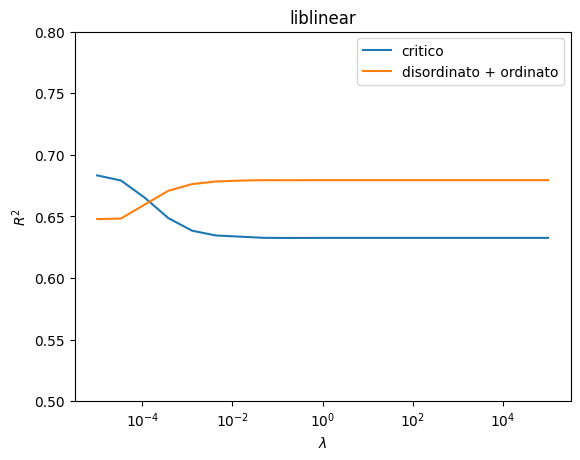

In [15]:
#plotting performance in function of regularization parameter
fig, ax = plt.subplots()
#ax.semilogx(c_params, test_perf_o, label = "oredered")
ax.semilogx(c_params, test_perf_c, label = "critico")
#ax.semilogx(c_params, test_perf_d, label = "disordered")
ax.semilogx(c_params, test_perf_o_and_d, label = "disordinato + ordinato")

ax.set_title("liblinear")
ax.legend()
ax.set(ylim=(0.5, 0.8))
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$R^2$")
fig.savefig("relazione/immagini/liblinear.png", dpi = 800)

In [16]:
#regularization parameter to iterate through
c_params = np.logspace(-4, 4, 20)

coefs = []
train_performance = []
test_perf_o = []
test_perf_c = []
test_perf_d = []
test_perf_o_and_d = []


for i in tqdm(range(c_params.size)):
    clf = LogisticRegression(C = c_params[i] , solver = "newton-cg")
    clf.fit(X_train, y_train)

    coefs.append(clf.coef_.tolist())
    train_performance.append(clf.score(X_train, y_train))
    #test_perf_o.append(clf.score(Xo_test, yo_test))
    test_perf_c.append(clf.score(Xc, yc))
    #test_perf_d.append(clf.score(Xd_test, yd_test))
    test_perf_o_and_d.append(clf.score(np.concatenate((Xo_test,Xd_test)), np.concatenate((yo_test,yd_test))))

100%|██████████| 20/20 [04:03<00:00, 12.19s/it]


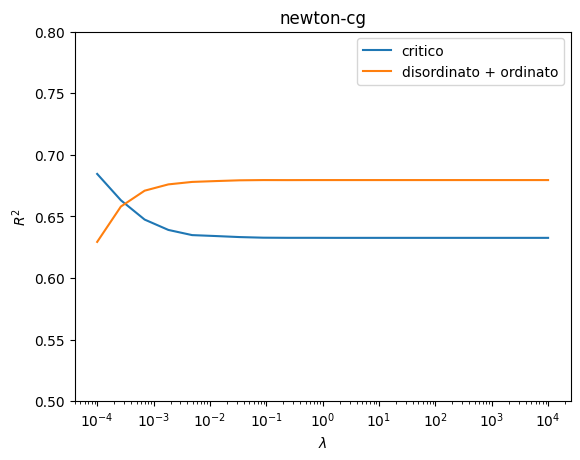

In [17]:
#plotting performance in function of regularization parameter
fig, ax = plt.subplots()
#ax.semilogx(c_params, test_perf_o, label = "oredered")
ax.semilogx(c_params, test_perf_c, label = "critico")
#ax.semilogx(c_params, test_perf_d, label = "disordered")
ax.semilogx(c_params, test_perf_o_and_d, label = "disordinato + ordinato")

ax.set_title("newton-cg")
ax.legend()
ax.set(ylim=(0.5, 0.8))
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$R^2$")
fig.savefig("relazione/immagini/newton-cg.png", dpi = 800)